In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

seed = 1337
np.random.seed(seed)
plt.rcParams["figure.figsize"] = (16,16)
perp = 40

In [2]:
def random_sample(data, num_samples):
    """Samples along first dimension of `data`"""
    idxs = np.random.choice(data.shape[0], size=num_samples, replace=False)
    return data[idxs]

# T-SNE visualization for document term matrix of top 128 words

In [3]:
dtm = np.load('../processed/dtm.npy')
dtm.shape

(34607, 129)

In [4]:
sample = random_sample(dtm, 5000)
X = sample[:,:-1]
Y = sample[:,-1]
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (5000, 128) Y.shape: (5000,)


In [5]:
pca = PCA(n_components=32)
pca_results = pca.fit_transform(X)

tsne = TSNE(n_jobs=4, perplexity=perp)
tsne_results = tsne.fit_transform(pca_results)

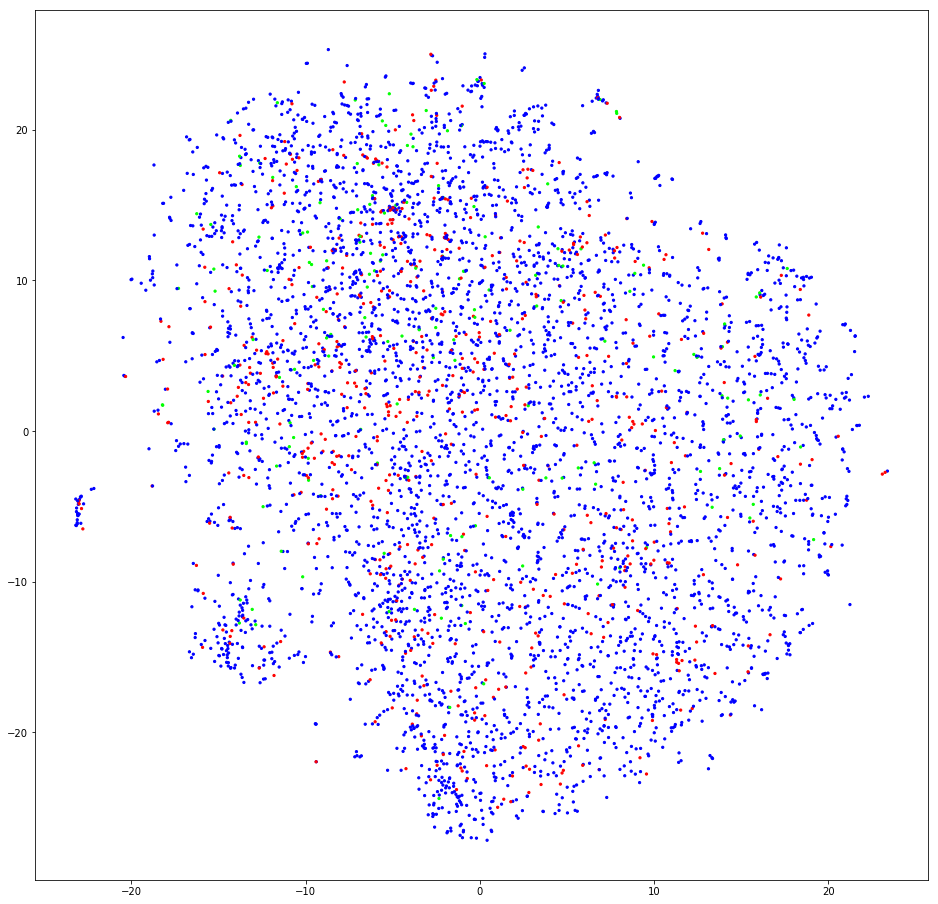

In [6]:
plt.tight_layout()
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=Y, cmap=plt.get_cmap('brg'), s=5)
plt.show()

# T-SNE visualization for word2vec document vectors for 128 dimensional embedding space

In [7]:
emb = np.load('../processed/embeddings.npy')
labels = dtm[:, -1:]  # Same order as dtm so use the labels from it
data = np.concatenate((emb, labels), axis=1)
data.shape

(34607, 129)

In [8]:
sample = random_sample(data, 5000)
X = sample[:,:-1]
Y = sample[:,-1]
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (5000, 128) Y.shape: (5000,)


In [9]:
pca = PCA(n_components=32)
pca_results = pca.fit_transform(X)

tsne = TSNE(n_jobs=4, perplexity=perp)
tsne_results = tsne.fit_transform(pca_results)

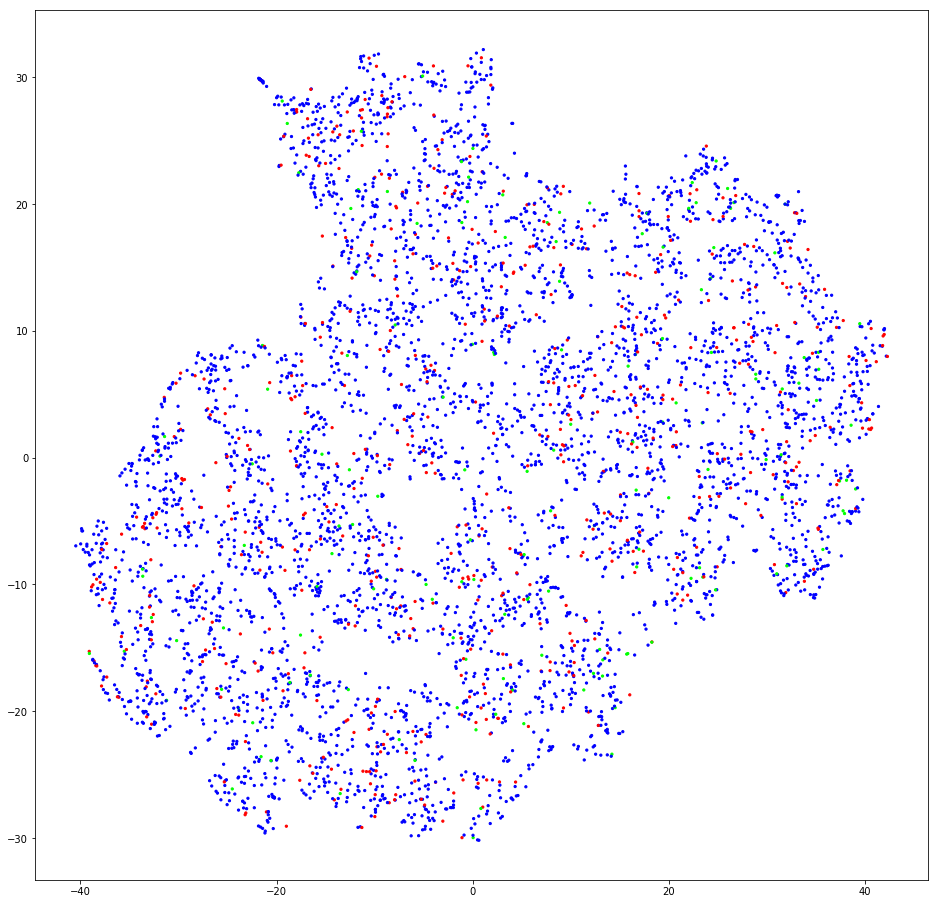

In [10]:
plt.tight_layout()
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=Y, cmap=plt.get_cmap('brg'), s=5)
plt.show()